In [2]:
from kaggle_secrets import UserSecretsClient

user_secrets = UserSecretsClient()
HF_TOKEN = user_secrets.get_secret("HF_TOKEN")
WANDB_TOKEN = user_secrets.get_secret("WANDB_TOKEN")

In [3]:
import huggingface_hub

try:
    # login(token=HF_TOKEN)
    huggingface_hub.login(token=HF_TOKEN)
    print("✅ Logged in to Hugging Face Hub")
except Exception as e:
    print(f"❌ Error during login: {e}")
    print("✅ Please ensure you have a valid Hugging Face token in your .env file.")
    exit(1)

✅ Logged in to Hugging Face Hub


In [4]:
import torch
from transformers import AutoModel, AutoModelForSequenceClassification
import matplotlib.pyplot as plt
import seaborn as sns

# Load models
BASE_MODEL_NAME = "Qwen/Qwen2.5-0.5B"
FT_MODEL_NAME = "rtweera/Qwen2.5-0.5B_2025-04-18_11-44-30"
base_model = AutoModel.from_pretrained(BASE_MODEL_NAME)
cls_model = AutoModelForSequenceClassification.from_pretrained(FT_MODEL_NAME)


config.json:   0%|          | 0.00/681 [00:00<?, ?B/s]

2025-04-18 10:37:35.002929: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744972655.217291      63 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744972655.281835      63 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


model.safetensors:   0%|          | 0.00/988M [00:00<?, ?B/s]

Sliding Window Attention is enabled but not implemented for `sdpa`; unexpected results may be encountered.


config.json:   0%|          | 0.00/947 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

In [9]:
def get_model_info(model):
    model_info = {}
    # List all layers and their parameters
    layers_info = []
    for name, module in model.named_modules():  # Get all modules (i.e. layers in pytorch terminology) in the network: https://pytorch.org/docs/stable/generated/torch.nn.Module.html
        layers_info.append({
            "Layer Name": name,
            "Layer Type": type(module).__name__,
            # module.parameters() returns an iterator over module parameters, which are the weights and biases of the layer (i.e. tensor). https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#torch.nn.parameter.Parameter
            # p.numel() returns the total number of elements in the tensor (i.e. the number of parameters in the layer). https://pytorch.org/docs/stable/generated/torch.numel.html#torch.numel
            "Number of Parameters": sum(p.numel() for p in module.parameters()),
            "Trainable Parameters": sum(p.numel() for p in module.parameters() if p.requires_grad),
        })

    model_info["Layers"] = layers_info
    return model_info

In [10]:
# Get model information
model_info = get_model_info(base_model)

print("\nLayers:")
for layer in model_info["Layers"]:
    print(f"  - {layer['Layer Name']} ({layer['Layer Type']}): {layer['Number of Parameters']:,} params")


Layers:
  -  (Qwen2Model): 494,032,768 params
  - embed_tokens (Embedding): 136,134,656 params
  - layers (ModuleList): 357,897,216 params
  - layers.0 (Qwen2DecoderLayer): 14,912,384 params
  - layers.0.self_attn (Qwen2Attention): 1,836,160 params
  - layers.0.self_attn.q_proj (Linear): 803,712 params
  - layers.0.self_attn.k_proj (Linear): 114,816 params
  - layers.0.self_attn.v_proj (Linear): 114,816 params
  - layers.0.self_attn.o_proj (Linear): 802,816 params
  - layers.0.mlp (Qwen2MLP): 13,074,432 params
  - layers.0.mlp.gate_proj (Linear): 4,358,144 params
  - layers.0.mlp.up_proj (Linear): 4,358,144 params
  - layers.0.mlp.down_proj (Linear): 4,358,144 params
  - layers.0.mlp.act_fn (SiLU): 0 params
  - layers.0.input_layernorm (Qwen2RMSNorm): 896 params
  - layers.0.post_attention_layernorm (Qwen2RMSNorm): 896 params
  - layers.1 (Qwen2DecoderLayer): 14,912,384 params
  - layers.1.self_attn (Qwen2Attention): 1,836,160 params
  - layers.1.self_attn.q_proj (Linear): 803,712 par

In [11]:
# Get model information
model_info = get_model_info(cls_model)

print("\nLayers:")
for layer in model_info["Layers"]:
    print(f"  - {layer['Layer Name']} ({layer['Layer Type']}): {layer['Number of Parameters']:,} params")


Layers:
  -  (Qwen2ForSequenceClassification): 493,792,640 params
  - model (Qwen2Model): 493,789,952 params
  - model.embed_tokens (Embedding): 135,891,840 params
  - model.layers (ModuleList): 357,897,216 params
  - model.layers.0 (Qwen2DecoderLayer): 14,912,384 params
  - model.layers.0.self_attn (Qwen2Attention): 1,836,160 params
  - model.layers.0.self_attn.q_proj (Linear): 803,712 params
  - model.layers.0.self_attn.k_proj (Linear): 114,816 params
  - model.layers.0.self_attn.v_proj (Linear): 114,816 params
  - model.layers.0.self_attn.o_proj (Linear): 802,816 params
  - model.layers.0.mlp (Qwen2MLP): 13,074,432 params
  - model.layers.0.mlp.gate_proj (Linear): 4,358,144 params
  - model.layers.0.mlp.up_proj (Linear): 4,358,144 params
  - model.layers.0.mlp.down_proj (Linear): 4,358,144 params
  - model.layers.0.mlp.act_fn (SiLU): 0 params
  - model.layers.0.input_layernorm (Qwen2RMSNorm): 896 params
  - model.layers.0.post_attention_layernorm (Qwen2RMSNorm): 896 params
  - mode

In [ ]:
base_state

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


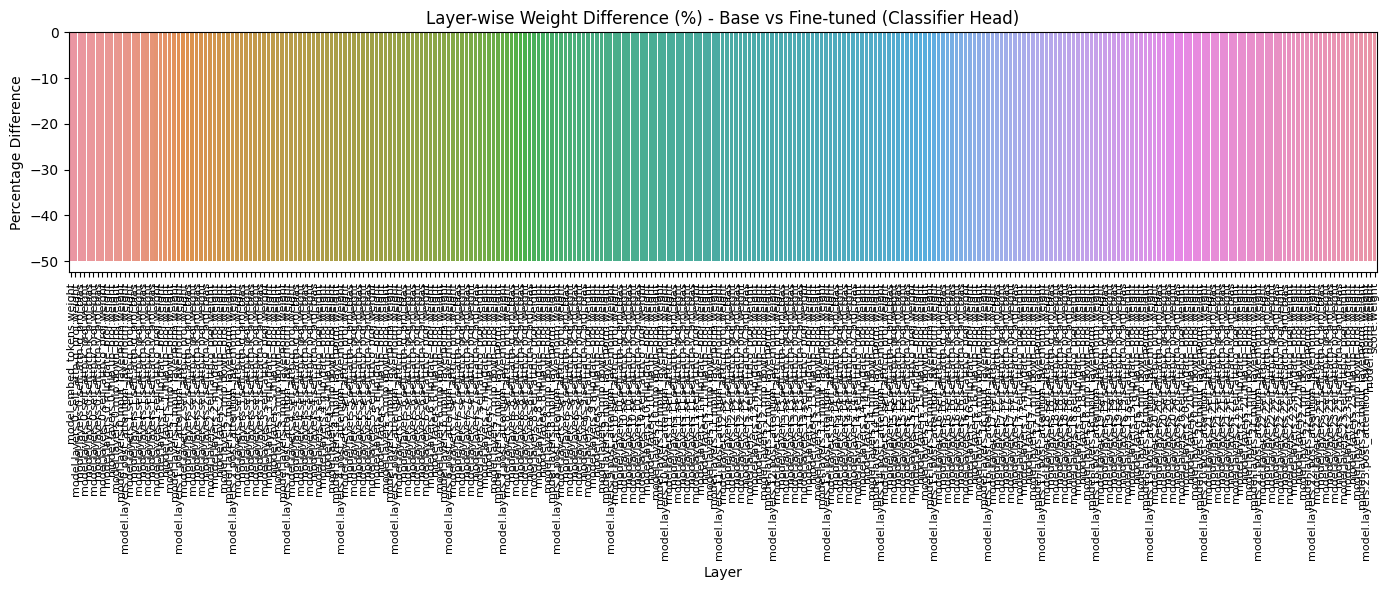

In [14]:
base_state = base_model.state_dict()
cls_state = cls_model.state_dict()

diffs = []
layer_names = []

for name, cls_param in cls_state.items():
    if name in base_state:
        base_param = base_state[name]

        if base_param.shape == cls_param.shape:
            # Compute element-wise absolute diff and total magnitude
            D = torch.abs(base_param - cls_param)
            SD = D.sum().item()
            SA = torch.abs(base_param).sum().item()
            percent_diff = (SD / SA) * 100 if SA != 0 else 0.0
            diffs.append(percent_diff)
            layer_names.append(name)
        else:
            # Classifier head (new layer)
            diffs.append(-20.0)
            layer_names.append(name)
    else:
        # New layer not in base model (e.g., classifier head)
        diffs.append(-50.0)
        layer_names.append(name)

# Plotting
plt.figure(figsize=(14, 6))
sns.barplot(x=list(range(len(diffs))), y=diffs)
plt.xticks(ticks=list(range(len(layer_names))), labels=layer_names, rotation=90, fontsize=8)
plt.ylabel("Percentage Difference")
plt.xlabel("Layer")
plt.title("Layer-wise Weight Difference (%) - Base vs Fine-tuned (Classifier Head)")
plt.tight_layout()
plt.show()
